# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 5
# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv("../../02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv")

Poglejmo si podatke.

In [2]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
...,...,...,...,...,...,...,...,...,...,...
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...
9999,10324144,Article 15,130,2019,8.3,NaN,11001,NaN,NaN,"In the rural heartlands of India, an upright p..."


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [3]:
filmi.sort_values(["ocena", "dolzina"])

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9896,7221896,Cumali Ceber: Allah Seni Alsin,100,2017,1.0,NaN,37198,NaN,NaN,Cumali Ceber goes to a vacation with his child...
9237,4009460,Saving Christmas,79,2014,1.4,18.0,14365,2783970.0,PG,His annual Christmas party faltering thanks to...
...,...,...,...,...,...,...,...,...,...,...
4196,252487,Hababam Sinifi,87,1975,9.4,NaN,34256,NaN,NaN,"Lazy, uneducated students share a very close b..."
9902,7286456,Joker,122,2019,9.5,70.0,14789,NaN,R,An original standalone origin story of the ico...


Poberite stolpec ocen.

In [4]:
ocene = filmi["ocena"]
ocene

0       6.4
1       7.8
       ... 
9998    5.6
9999    8.3
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [5]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [6]:
zaokrozeno = round(ocene)
zaokrozeno
type(zaokrozeno)

pandas.core.series.Series

Dodajte zaokrožene vrednosti v podatke.

In [7]:
filmi["zaokrozeno"] = zaokrozeno  #Series ali pa seznam lahko vključimo, le da mora biti primerne dolžine
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0
9999,10324144,Article 15,130,2019,8.3,NaN,11001,NaN,NaN,"In the rural heartlands of India, an upright p...",8.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [8]:
filmi.drop(columns = "zaokrozeno") #Inplace stvari nam spremenijo in ne vrnejo; to vrne in najbrž ne spremeni (ni nujno)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
...,...,...,...,...,...,...,...,...,...,...
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...
9999,10324144,Article 15,130,2019,8.3,NaN,11001,NaN,NaN,"In the rural heartlands of India, an upright p..."


In [9]:
del filmi["zaokrozeno"] #Tole pa zares zbriše stolpec

### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [10]:
filmi[ ["leto", "naslov", "ocena"] ]

,leto,naslov,ocena
0,1915,The Birth of a Nation,6.4
1,1916,Intolerance: Love's Struggle Throughout the Ages,7.8
...,...,...,...
9998,2019,Falling Inn Love,5.6
9999,2019,Article 15,8.3


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [11]:
stari = filmi["leto"]  < 1930
novi = filmi["leto"] > 2017
ocene = filmi["ocena"] > 8
filmi[(stari | novi) & ocene]                   #Ta navpična črtica je namesto OR

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...
9999,10324144,Article 15,130,2019,8.3,NaN,11001,NaN,NaN,"In the rural heartlands of India, an upright p..."


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [12]:
def manj_ali_enako_besed(x, st_besed=2):
    return len(x.split()) <= st_besed

kratki = filmi["naslov"].apply(manj_ali_enako_besed)
filmi[kratki & (filmi["ocena"] > 8)]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
5,12364,Körkarlen,100,1921,8.1,NaN,9106,NaN,NaN,"On New Year's Eve, the driver of a ghostly car..."
...,...,...,...,...,...,...,...,...,...,...
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...
9999,10324144,Article 15,130,2019,8.3,NaN,11001,NaN,NaN,"In the rural heartlands of India, an upright p..."


### Histogrami

Združite filme po ocenah in jih preštejte.

In [13]:
st_ocen = filmi.groupby("ocena").size()
st_ocen

ocena
1.0    1
1.4    3
      ..
9.4    1
9.5    1
Length: 82, dtype: int64

Naredite stolpični diagram teh podatkov.

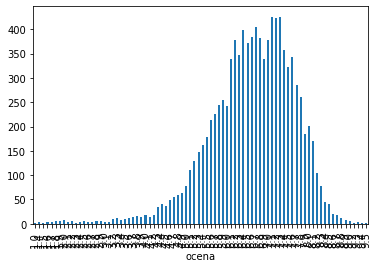

In [14]:
st_ocen.plot.bar()  #V dokumentaviji poglej kako prilagoditi napise pod spodnjo osjo

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

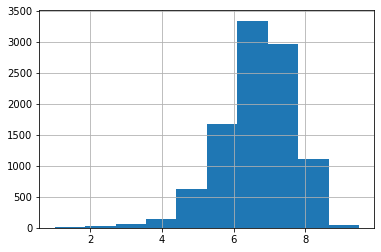

In [15]:
filmi["ocena"].hist()

### Izris povprečne dolžine filma glede na leto

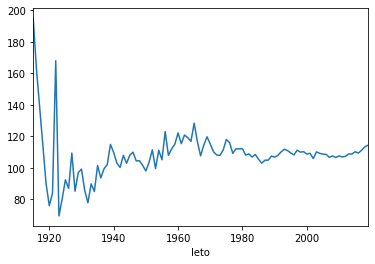

In [16]:
#Združimo po letu, povprečne dolžine nato izrišemo

po_letu  = filmi.groupby("leto")
(po_letu.mean()["dolzina"]).plot()

### Izris skupnega zasluzka za posamezno leto

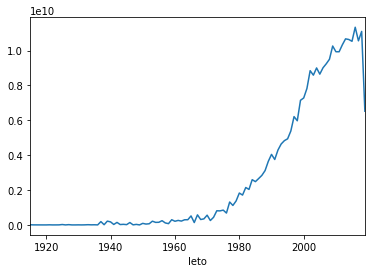

In [17]:
(po_letu.sum()["zasluzek"]).plot()           #Fajn stvar: Anscombe's quartet (na wikipediji)